In [ ]:
!pip install deeplabcut

In [50]:
import deeplabcut

In [51]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

In [122]:
# this is example data from the public project: https://github.com/AlexEMG/DeepLabCut/tree/master/examples/openfield-Pranav-2018-10-30
video='/content/drive/MyDrive/Deeplabcut/Silkworms-MMasaki-2022-07-20/videos/June5.mp4'
DLCscorer='DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000_el'

# dataname = str(Path(video).stem) + DLCscorer + '.h5'
dataname = '/content/drive/MyDrive/Deeplabcut/Silkworms-MMasaki-2022-07-20/videos/June5DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000_el.h5'

# #loading output of DLC
Dataframe = pd.read_hdf(os.path.join(dataname))


In [114]:
Dataframe.head()

scorer      DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000                      \
individuals                                    control                       
bodyparts                                         head                       
coords                                               x        y likelihood   
0                                              234.487  429.002        1.0   
1                                              237.271  423.151        1.0   
2                                              234.828  419.745        1.0   
3                                              234.284  415.219        1.0   
4                                              237.107  410.720        1.0   

scorer                                                                 \
individuals                                                             
bodyparts    ganzyou                     hirazuki                       
coords             x        y likelihood        x        y likelihood   
0            235.801  431.654        1.0  278.057  438.421      1.000   
1            237.946  428.620        1.0  276.581  435.797      1.000   
2            237.035  425.786        1.0  278.048  433.119      0.997   
3            237.573  419.346        1.0  276.213  429.665      1.000   
4            236.649  412.833        1.0  277.617  429.254      1.000   

scorer                ...                                                  \
individuals           ...      alert                                        
bodyparts     oshiri  ...       head  ganzyou                    hirazuki   
coords             x  ... likelihood        x       y likelihood        x   
0            364.507  ...      1.000  375.962  76.061      1.000  340.146   
1            362.160  ...        NaN      NaN     NaN        NaN      NaN   
2                NaN  ...      1.000  768.966  58.830      0.997  739.406   
3            357.997  ...      0.999  779.392  54.784      0.994  746.539   
4            358.202  ...      1.000  783.930  54.533      0.998  755.018   

scorer                                                      
individuals                                                 
bodyparts                        oshiri                     
coords            y likelihood        x       y likelihood  
0            74.128      1.000      NaN     NaN      0.000  
1               NaN        NaN      NaN     NaN        NaN  
2            69.633      0.645  660.972  91.175      0.999  
3            58.795      0.901      NaN     NaN      0.000  
4            57.113      0.979      NaN     NaN      0.000  

[5 rows x 48 columns]

In [123]:
Df_T = Dataframe.T
Df_T.head()

0     \
scorer                                     individuals bodyparts coords                
DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000 alert       head      x           234.487   
                                                                 y           429.002   
                                                                 likelihood    1.000   
                                                       ganzyou   x           235.801   
                                                                 y           431.654   

                                                                                1     \
scorer                                     individuals bodyparts coords                
DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000 alert       head      x           237.271   
                                                                 y           423.151   
                                                                 likelihood    1.000   
                                                       ganzyou   x           237.946   
                                                                 y           428.620   

                                                                                2     \
scorer                                     individuals bodyparts coords                
DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000 alert       head      x           234.828   
                                                                 y           419.745   
                                                                 likelihood    1.000   
                                                       ganzyou   x           237.035   
                                                                 y           425.786   

                                                                                3     \
scorer                                     individuals bodyparts coords                
DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000 alert       head      x           234.284   
                                                                 y           415.219   
                                                                 likelihood    1.000   
                                                       ganzyou   x           237.573   
                                                                 y           419.346   

                                                                                4     \
scorer                                     individuals bodyparts coords                
DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000 alert       head      x           237.107   
                                                                 y           410.720   
                                                                 likelihood    1.000   
                                                       ganzyou   x           236.649   
                                                                 y           412.833   

                                                                                5     \
scorer                                     individuals bodyparts coords                
DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000 alert       head      x           237.731   
                                                                 y           412.922   
                                                                 likelihood    1.000   
                                                       ganzyou   x           237.601   
                                                                 y           414.781   

                                                                                6     \
scorer                                     individuals bodyparts coords                
DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000 alert       head      x           238.856   
                                                                 y           406.273   
                          

In [127]:
Dataframe = Df_T.loc[('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000','alert')]


In [128]:
Dataframe.columns.values

array([   0,    1,    2, ..., 8993, 8994, 8995])

In [129]:
Dataframe = Dataframe.T
Dataframe.head()

bodyparts     head                      ganzyou                     hirazuki  \
coords           x        y likelihood        x        y likelihood        x   
0          234.487  429.002        1.0  235.801  431.654        1.0  278.057   
1          237.271  423.151        1.0  237.946  428.620        1.0  276.581   
2          234.828  419.745        1.0  237.035  425.786        1.0  278.048   
3          234.284  415.219        1.0  237.573  419.346        1.0  276.213   
4          237.107  410.720        1.0  236.649  412.833        1.0  277.617   

bodyparts                       oshiri                      
coords           y likelihood        x        y likelihood  
0          438.421      1.000  364.507  385.132      0.768  
1          435.797      1.000  362.160  384.937      0.977  
2          433.119      0.997      NaN      NaN      0.000  
3          429.665      1.000  357.997  384.873      0.959  
4          429.254      1.000  358.202  384.995      0.965

In [54]:
# matplolibの色を設定(rf:https://matplotlib.org/stable/tutorials/colors/colormaps.html)
def get_cmap(n, name='Purples'):
  return plt.cm.get_cmap(name,n)

In [112]:
Dataframe.columns.values

array([('head', 'x'), ('head', 'y'), ('head', 'likelihood'),
       ('ganzyou', 'x'), ('ganzyou', 'y'), ('ganzyou', 'likelihood'),
       ('hirazuki', 'x'), ('hirazuki', 'y'), ('hirazuki', 'likelihood'),
       ('oshiri', 'x'), ('oshiri', 'y'), ('oshiri', 'likelihood')],
      dtype=object)

In [55]:
def Histogram(vector,color,bins):
  # vectorは、恐らくデータ。
  # np.diffでvectorにあるデータの差分(dvector)をとる
  dvector = np.diff(vector)
  # np.isfinite（）関数は、有限かどうか（無限大ではないか、数値ではないか）を要素ごとにテストし、結果をブール配列として返す。
  dvector = dvector[np.isfinite(dvector)]
  # histtype:ヒストグラムの形,binsは階級数
  plt.hist(dvector,color=color,histtype='step',bins=bins)

Plot poses vs time; pose x vs pose y; histgram of differences and likelihoods.

In [47]:
from pandas.core.indexes.base import Index
def PlottingResults(Dataframe, bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot), name = colormap)
    # Dataframe colums names=>['scorer', 'individuals', 'bodyparts', 'coords'])
    # 先頭の一個目をscorerに格納
    scorer = Dataframe.columns.get_level_values(0)[0] 

    #bodyparts2plotの要素のインデックスと要素を同時に取り出す 
    #bpはBodyPartsの略
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
    # 時間ごとに、bpの尤度をプロット
        plt.plot(Time, Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

  # ちょいとよく分からん
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame Index')
    plt.ylabel('likelihood')

    plt.figure(figsize=fs)
    bins = np.linspace(0, np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index = Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X = Dataframe[scorer][bp]['x'].values
        X[Index] = np.nan
        Histogram(X,colors(bpindex),bins)
        Y[Index] = np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap),norm=plt.Normalize(vmin=0,vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm, ticks=range(len(bodyparts2plot)))
    plt.ylabel('Count')
    plt.xlabel('Delta X and Delta Y')

In [ ]:
# Dataframeのindexにおける列の二個目をbodypartsに格納
# 
bodyparts = Dataframe.columns
bodyparts

MultiIndex([('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000', 'control', ...),
            ('DLC_dlcrnetms5_SilkwormsJul20shuffle1_9000',  'yellow', ...),
            

In [168]:
bodyparts = Dataframe.columns.get_level_values(0)
bodyparts
bodyparts2plot=['hirazuki']
bodyparts2plot

['hirazuki']

In [166]:
# Dataframeのindexにおける列の二個目をbodypartsに格納
# names=['scorer', 'individuals', 'bodyparts', 'coords'])
bodyparts = Dataframe.columns.get_level_values(0)
bodyparts2plot = bodyparts
bodyparts2plot=['hirazuki']
%matplotlib inline 
PlottingResults(Dataframe, bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

KeyError: ignored

<Figure size 576x288 with 0 Axes>

In [162]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))

In [163]:
# # bodyparts=Dataframe.columns.get_level_values(2) #you can read out the header to get body part names!

# bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']
# # bodyparts2plot=bodyparts['ganzyou'] #you could also take a subset, i.e. =['snout']
# %matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

# These plots can are interactive and can be customized (see https://matplotlib.org/) [in the code above]
# note that the snout and other bpts jitter in this example that was not trained for long.

KeyError: ignored

<Figure size 576x288 with 0 Axes>

In [ ]:
bodyparts2plot

In [174]:
import time_in_each_roi

In [169]:
%cd /content/drive/MyDrive/DLCutils-master

/content/drive/MyDrive/DLCutils-master


In [197]:
# xsnout=Dataframe['oshiri']['x'].values.nan_to_num(x, nan=0)
# xsnout
x = Dataframe['oshiri']['x'].values
x = np.nan_to_num(x, nan=0)
y = Dataframe['oshiri']['y'].values
y = np.nan_to_num(x, nan=0)

In [198]:
y.flatten()

array([364.507, 362.16 ,   0.   , ..., 561.151, 560.974, 560.577])

In [206]:
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([x.flatten(), y.flatten()]).T)

In [177]:
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([Dataframe['oshiri']['x'].values.flatten(), Dataframe['oshiri']['y'].values.flatten()]).T)

ValueError: ignored

In [207]:
#let's calculate velocity of the snout
bpt='oshiri'
# vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([Dataframe['oshiri']['x'].values.flatten(), Dataframe['oshiri']['y'].values.flatten()]).T)

fps=30 # frame rate of camera in those experiments
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]

# store in other variables:
xsnout=Dataframe[bpt]['x'].values
ysnout=Dataframe[bpt]['y'].values
# xsnout=Dataframe[DLCscorer][elp]['x'].values
# ysnout=Dataframe[DLCscorer][elp]['y'].values
vsnout=vel

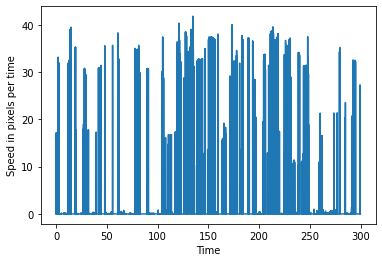

In [212]:
%matplotlib inline

plt.plot(time,vel*1./fps)
plt.xlabel('Time')
plt.ylabel('Speed in pixels per time')
plt.show()

In [220]:
#define bounding boxes (here for left and right side of treadmill, displayed below)
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((xsnout, ysnout, vsnout))

#two points defining each roi: topleft(X,Y) and bottomright(X,Y).
rois = {'leftside': position((0, 0), (500, 510)),'rightside': position((500, 0), (1000, 510))} 
print(rois)

{'leftside': position(topleft=(0, 0), bottomright=(500, 510)), 'rightside': position(topleft=(500, 0), bottomright=(1000, 510))}


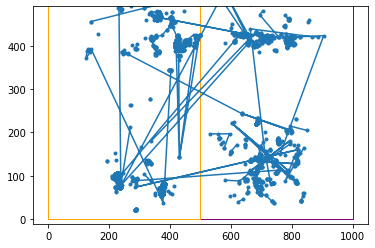

In [221]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

#plot snout + bounding boxes for rois
plt.plot(xsnout,ysnout,'.-')

rect = patches.Rectangle(rois['rightside'].topleft,rois['rightside'].bottomright[0]-rois['rightside'].topleft[0],rois['rightside'].bottomright[1]-rois['rightside'].topleft[1],linewidth=1,edgecolor='purple',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle(rois['leftside'].topleft,rois['leftside'].bottomright[0]-rois['leftside'].topleft[0],rois['leftside'].bottomright[1]-rois['leftside'].topleft[1],linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
plt.ylim(-11,491)
plt.show()

In [222]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

res = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=30)

#print results:
res

/content/drive/MyDrive/DLCutils-master/time_in_each_roi.py:142: UserWarning: Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.
  warnings.warn("Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.")


{'avg_time_in_roi': {'leftside': 11.06341463414634,
  'rightside': 32.81951219512195,
  'tot': 43.88292682926829},
 'avg_time_in_roi_sec': {'leftside': 0.36878048780487804,
  'rightside': 1.0939837398373984,
  'tot': 1.4627642276422765},
 'avg_vel_in_roi': {'leftside': 45.79612991228904,
  'rightside': 92.90703870737667,
  'tot': 138.70316861966572},
 'cumulative_time_in_roi': {'leftside': 6728, 'rightside': 2268, 'tot': 8996},
 'cumulative_time_in_roi_sec': {'leftside': 224.26666666666668,
  'rightside': 75.6,
  'tot': 299.8666666666667},
 'transitions_per_roi': {'leftside': 205, 'rightside': 205, 'tot': 410}}

SyntaxError: ignored

Reference
https://github.com/DeepLabCut/DLCutils